# LD calculation between top eQTL in GTEx V6 data

Here we compute the LD between the 16K top eQTL we analyzed in GTEx data. Two methods were used:

1. Simple correlation between genotypes
2. A sparse method (Wen & Stephens 2010)

We expect to see very weak LD between genotypes. We use Whole Blood sample genotypes because it has a large sample size.

## A survey of strong LD patterns

We take a look at sparse method result for chromosome 1. 

In [1]:
dat = as.matrix(readRDS("LD_Whole_Blood_1.RDS"))
dim(dat)[1]

Loading required package: Matrix


[1] 1526

We adjust names of columns and rows:

In [2]:
rownames(dat) = unlist(lapply(rownames(dat), function(x) (paste(strsplit(x, '_')[[1]][-1], collapse = '_'))))
colnames(dat) = unlist(lapply(colnames(dat), function(x) (paste(strsplit(x, '_')[[1]][-1], collapse = '_'))))

We mark the upper triangle and diagonal of the matrix zero, because the matrix is symetric with diagonal elements equal 1. We want to focus on values in the lower triangle.

In [3]:
dat0 = dat
diag(dat) = 0
dat[upper.tri(dat)] = 0

Now we count the total number and proportion of LD pairs having LD greater than 0.5:

In [4]:
m = abs(dat) > 0.5
sum(m)
sum(m) / ((dim(dat)[1]^2 - dim(dat)[1])/ 2)

[1] 1085

[1] 0.000932471

The SNPs involved are (**unique row and column names of TRUE entries in matrix `m`**):

In [5]:
snps <- c(rownames(m)[row(m)[which(m)]], colnames(m)[col(m)[which(m)]])
length(unique(snps))

[1] 800

## A survey of overall LD patterns

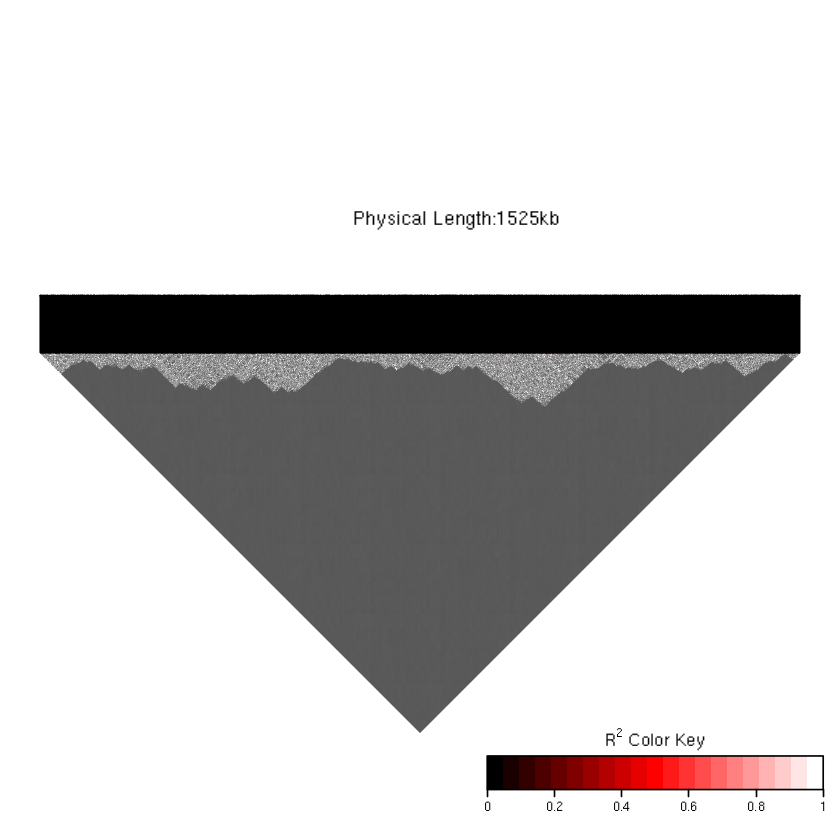

In [6]:
colors = c(
"#ffffff",
"#ffe6e6",
"#ffcccc",
"#ffb3b3",
"#ff9999",
"#ff8080",
"#ff6666",
"#ff4d4d",
"#ff3333",
"#ff1a1a",
"#ff0000",
"#e60000",
"#cc0000",
"#b30000",
"#990000",
"#800000",
"#660000",
"#4d0000",
"#330000",
"#1a0000",
"#000000"
)
LDheatmap::LDheatmap(dat0, color = colors, flip = T, title = "")

## Putting together all chroms

In [7]:
grid = c(0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99)
prop = matrix(0, length(grid), 22)
snps = matrix(0, length(grid), 22)
n_snps = 0
for (i in 1:22) {
    tmp = as.matrix(readRDS(paste0("LD_Whole_Blood_", i, ".RDS")))
    diag(tmp) = 0
    tmp[upper.tri(tmp)] = 0
    n_snps = n_snps + dim(tmp)[1]
    for (j in 1:length(grid)) {
        m = abs(tmp) > grid[j]
        prop[j,i] = sum(m) / ((dim(tmp)[1]^2 - dim(tmp)[1])/ 2)
        ss = c(rownames(m)[row(m)[which(m)]], colnames(m)[col(m)[which(m)]])
        snps[j,i] = length(unique(ss))
    }
}

Here is summary of proportion of pairs on each chromosome (row) having LD greater than thresholds (column)

In [8]:
prop = data.frame(t(prop))
colnames(prop) = grid
rownames(prop) = paste('chr', 1:22)
prop
apply(prop, 2, mean)

,0.5,0.6,0.7,0.8,0.9,0.95,0.99
chr 1,0.0009324710,0.0005990160,0.0003927551,0.0002604044,0.0001392261,7.476957e-05,2.148551e-05
chr 2,0.0011014421,0.0007685010,0.0005290571,0.0003443432,0.0001915552,9.805800e-05,1.140209e-05
chr 3,0.0017717942,0.0012900472,0.0008179999,0.0004591146,0.0002942213,1.810593e-04,1.939921e-05
chr 4,0.0012087494,0.0009189807,0.0006788866,0.0004801881,0.0002318149,1.490239e-04,4.139553e-05
chr 5,0.0007513954,0.0005367110,0.0003220266,0.0003220266,0.0001073422,0.000000e+00,0.000000e+00
chr 6,0.0012736848,0.0007775679,0.0005867537,0.0004436430,0.0003005324,1.717328e-04,2.862213e-05
chr 7,0.0019096294,0.0013391177,0.0009746241,0.0006537113,0.0003644936,2.060181e-04,2.377132e-05
chr 8,0.0018098755,0.0014376834,0.0010654912,0.0006568097,0.0003138091,1.167662e-04,2.189366e-05
chr 9,0.0019810219,0.0014407432,0.0009998261,0.0005589090,0.0003477656,1.552525e-04,4.347070e-05
chr 10,0.0019689407,0.0014531337,0.0011203550,0.0007210205,0.0003105935,1.663894e-04,4.437049e-05


0.5          0.6          0.7          0.8          0.9         0.95 
2.015403e-03 1.411315e-03 9.653859e-04 6.447133e-04 3.286005e-04 1.587310e-04 
        0.99 
2.524263e-05

Here is summary of number of unique SNPs involved on each chromosome (row) having LD greater than thresholds (column)

In [9]:
snps = data.frame(t(snps))
colnames(snps) = grid
rownames(snps) = paste('chr', 1:22)
snps

,0.5,0.6,0.7,0.8,0.9,0.95,0.99
chr 1,800,668,524,412,257,154,44
chr 2,422,346,268,204,136,77,10
chr 3,366,309,253,172,124,83,12
chr 4,176,139,116,90,52,33,10
chr 5,14,10,6,6,2,0,0
chr 6,258,190,152,114,88,58,12
chr 7,345,309,253,187,127,79,12
chr 8,219,185,145,103,68,32,6
chr 9,256,206,166,124,83,36,14
chr 10,278,222,185,125,78,43,13


Proportion of SNPs involved are:

In [10]:
apply(snps, 2, sum) / n_snps

0.5        0.6        0.7        0.8        0.9       0.95       0.99 
0.47649811 0.39451994 0.31514071 0.23709809 0.15148140 0.08918096 0.02004901